<br></br>
# **pip3 install konlpy**
<br></br>
## **1 한글 에서의 Token 와 Tag 생성**

In [1]:
# ! pip3 install konlpy

In [2]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'

from konlpy.tag import Okt
twitter = Okt()
print(twitter.pos(text))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('했다', 'Verb')]
CPU times: user 7.46 s, sys: 420 ms, total: 7.88 s
Wall time: 3.16 s


In [3]:
%%time
text = '민병삼 대령의 항명행위로 초치했다'
print(twitter.pos(text, stem=True))

[('민병삼', 'Noun'), ('대령', 'Noun'), ('의', 'Josa'), ('항', 'Noun'), ('명', 'Suffix'), ('행위', 'Noun'), ('로', 'Josa'), ('초치', 'Noun'), ('하다', 'Verb')]
CPU times: user 60.5 ms, sys: 0 ns, total: 60.5 ms
Wall time: 30.8 ms


In [4]:
%%time
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.pos(text))

[('민병', 'NNG'), ('삼', 'NNG'), ('대령', 'NNG'), ('의', 'JKG'), ('항명', 'NNG'), ('행위', 'NNG'), ('로', 'JKM'), ('초치', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'EFN')]
CPU times: user 19.8 s, sys: 145 ms, total: 19.9 s
Wall time: 6.49 s


In [5]:
%%time
from konlpy.tag import Hannanum
han = Hannanum()
print(han.pos(text))

[('민병삼', 'N'), ('대령', 'N'), ('의', 'J'), ('항명행위', 'N'), ('로', 'J'), ('초치했다', 'N')]
CPU times: user 2.43 s, sys: 8.18 ms, total: 2.44 s
Wall time: 771 ms


<br></br>
## **2 한글 WordCloud 만들기**

In [6]:
# 독일 퀘르버 재단 연설문 : 베를린 선언
f     = open('../data/베를린선언.txt', 'r')
texts_org = f.read()
f.close()

In [7]:
texts_nouns = twitter.nouns(texts_org)
texts_nouns[:10]

['존경', '독일', '국민', '여러분', '고국', '국민', '여러분', '하울', '젠', '쾨르버']

In [8]:
result_nouns = ''
for txt in texts_nouns:
    result_nouns += " " + txt

result_nouns[:500]

' 존경 독일 국민 여러분 고국 국민 여러분 하울 젠 쾨르버 재단 이사 모드 전 동독 총리 비롯 내외 귀빈 여러분 먼저 냉전 분단 통일 그 힘 유럽 통합 국제 평화 선도 독일 독일 국민 무한 경의 표 오늘 이 자리 마련 주신 독일 정부 쾨르버 재단 감사 얼마 전 별세 헬 무트 콜 총리 가족 독일 국민 은 애도 위로 마음 전 대한민국 냉전 시기 환경 속 적극 능동 외교 독일 통일 유럽 통합 헬 무트 콜 총리 업적 기억 것 내외 귀빈 여러분 곳 베를린 지금 전 한국 김대중 대통령 남북 화해 협력 기틀 마련 베를린 선언 발표 곳 여기 알테스 슈 타트 하우스 독일 통일 조약 협상 역사 현장 나 오늘 베를린 교훈 이 자리 대한민국 새 정부 한반도 평화 구상 내외 귀빈 여러분 독일 통일 경험 지구 마지막 분단국가 우리 통일 대한 희망 우리 방향 말 그것 우선 통일 과정 중요성 독일 통일 상호 존중 바탕 평화 협력 과정 얼마나 일 독일 국민 이 과정 축적 신뢰 바탕 스스로 통일 결정 수 서독 시민'

(-0.5, 399.5, 199.5, -0.5)

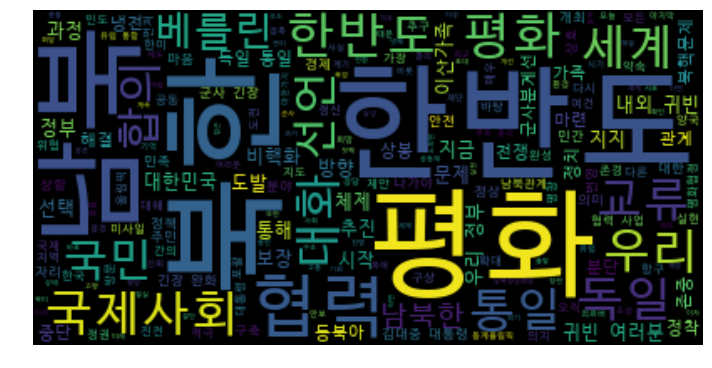

In [9]:
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', family='NanumGothic')

from wordcloud import WordCloud
wcloud = WordCloud('../data/D2Coding.ttf',relative_scaling = 0.2).generate(result_nouns)
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")

<br></br>
## **추가 옵션들 실습하기**
https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

In [10]:
# wcloud = WordCloud('./data/godoMaum.ttf',relative_scaling = 0.2, height=300, width=700).generate(texts_org)
# wcloud.to_file('./data/wordcloud.jpg')
# plt.savefig('./data/wordcloud.jpg', dpi=300)